In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# sklearn :: models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# sklearn :: evaluation metrics
from sklearn.metrics import cohen_kappa_score

sns.set_style('whitegrid')

# Problem definition

Predict when a pet will be adopted

# Load the data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(10000, 24) (4993, 23)


# Feature Engineering

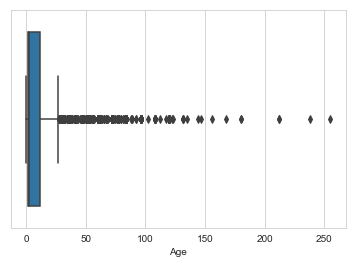

In [3]:
sns.boxplot(x=df_train['Age'])

In [4]:
#print(df_train.columns)
#df_train.head()
df_train.shape

(10000, 24)

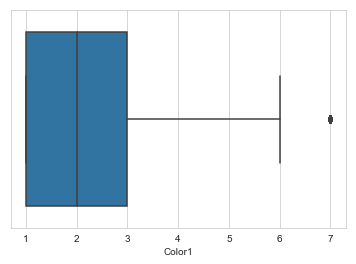

In [5]:
#df_train.drop(df_train[df_train.Color1 > 4].index, inplace=True)
sns.boxplot(x=df_train['Color1'])

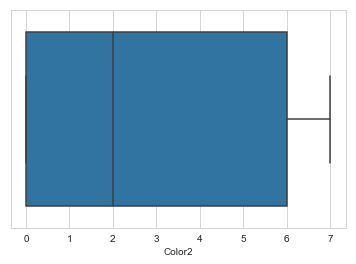

In [6]:
sns.boxplot(x=df_train['Color2'])

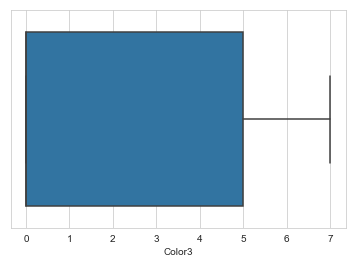

In [7]:
sns.boxplot(x=df_train['Color3'])

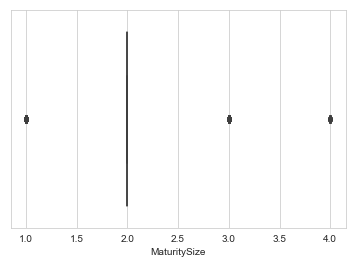

In [8]:
#df_train.drop(df_train[df_train.MaturitySize > 2].index, inplace=True)
sns.boxplot(x=df_train['MaturitySize'])

In [9]:
# Check for missing values
#df_train.isnull().sum(axis = 0)

In [10]:
# apply dummies on the training set
col = 'Health'
df_dummies = pd.get_dummies(df_train[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df_train = pd.concat([df_train, df_dummies], axis=1)

# apply the same dummies on the test set
col = 'Health'
df_dummies = pd.get_dummies(df_test[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df_test = pd.concat([df_test, df_dummies], axis=1)

In [11]:
# apply dummies on the training set
col = 'Breed1'
df_dummies = pd.get_dummies(df_train[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
breed1 = df_dummies.columns
df_train = pd.concat([df_train, df_dummies], axis=1)


In [12]:
# apply dummies on the test set
col = 'Breed1'
df_dummies = pd.get_dummies(df_test[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
breed1_test = df_dummies.columns
df_test = pd.concat([df_test, df_dummies], axis=1)

In [13]:
breed1_intersection = list(set(breed1).intersection(breed1_test))

In [14]:
print(len(breed1))
print(len(breed1_test))
print(len(breed1_intersection))

162
135
121


In [15]:
#breed1_intersection

In [16]:
breed1_intersection.remove('Breed1_248')
breed1_intersection.remove('Breed1_279')
breed1_intersection.remove('Breed1_263')
breed1_intersection.remove('Breed1_274')
breed1_intersection.remove('Breed1_88')
#breed1_intersection.remove('Breed1_271')
#breed1_intersection.remove('Breed1_114')
breed1_intersection.remove('Breed1_260')
#breed1_intersection.remove('Breed1_246')
#breed1_intersection.remove('Breed1_5')
breed1_intersection.remove('Breed1_169')
breed1_intersection.remove('Breed1_270')
breed1_intersection.remove('Breed1_272')
breed1_intersection.remove('Breed1_182')
breed1_intersection.remove('Breed1_5')
breed1_intersection.remove('Breed1_271')
breed1_intersection.remove('Breed1_19')
breed1_intersection.remove('Breed1_301')
breed1_intersection.remove('Breed1_269')
breed1_intersection.remove('Breed1_32')
breed1_intersection.remove('Breed1_231')
breed1_intersection.remove('Breed1_42')
breed1_intersection.remove('Breed1_232')
breed1_intersection.remove('Breed1_17')
breed1_intersection.remove('Breed1_150')
breed1_intersection.remove('Breed1_24')
breed1_intersection.remove('Breed1_114')
breed1_intersection.remove('Breed1_65')
breed1_intersection.remove('Breed1_202')
breed1_intersection.remove('Breed1_190')
breed1_intersection.remove('Breed1_132')
breed1_intersection.remove('Breed1_197')
breed1_intersection.remove('Breed1_280')
breed1_intersection.remove('Breed1_304')
###  non 0.0 
breed1_intersection.remove('Breed1_246')


In [17]:
# apply dummies on the training set
col = 'Breed2'
df_dummies = pd.get_dummies(df_train[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
breed2 = df_dummies.columns
df_train = pd.concat([df_train, df_dummies], axis=1)

In [18]:
# apply dummies on the test set
col = 'Breed2'
df_dummies = pd.get_dummies(df_test[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
breed2_test = df_dummies.columns
df_test = pd.concat([df_test, df_dummies], axis=1)

In [19]:
breed2_intersection = list(set(breed2).intersection(breed2_test))

In [20]:
breed2_intersection.remove('Breed2_277')
#breed2_intersection.remove('Breed2_294')
#breed2_intersection.remove('Breed2_5')
breed2_intersection.remove('Breed2_294')
breed2_intersection.remove('Breed2_24')
#breed2_intersection.remove('Breed2_245')
breed2_intersection.remove('Breed2_173')
breed2_intersection.remove('Breed2_69')
breed2_intersection.remove('Breed2_147')
breed2_intersection.remove('Breed2_192')
breed2_intersection.remove('Breed2_278')
breed2_intersection.remove('Breed2_248')
breed2_intersection.remove('Breed2_26')
breed2_intersection.remove('Breed2_96')
breed2_intersection.remove('Breed2_201')
breed2_intersection.remove('Breed2_242')
breed2_intersection.remove('Breed2_178')
breed2_intersection.remove('Breed2_70')
breed2_intersection.remove('Breed2_206')
breed2_intersection.remove('Breed2_169')
breed2_intersection.remove('Breed2_18')
breed2_intersection.remove('Breed2_187')
breed2_intersection.remove('Breed2_44')
breed2_intersection.remove('Breed2_21')
breed2_intersection.remove('Breed2_256')
breed2_intersection.remove('Breed2_16')
breed2_intersection.remove('Breed2_282')
breed2_intersection.remove('Breed2_14')
breed2_intersection.remove('Breed2_270')
breed2_intersection.remove('Breed2_19')
breed2_intersection.remove('Breed2_289')
breed2_intersection.remove('Breed2_245')


In [21]:
print(len(breed2))
print(len(breed2_test))
print(len(breed2_intersection))

121
95
52


In [22]:
# apply dummies on the training set
col = 'Sterilized'
df_dummies = pd.get_dummies(df_train[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
Ster_tr = df_dummies.columns
df_train = pd.concat([df_train, df_dummies], axis=1)

# apply dummies on the test set
col = 'Sterilized'
df_dummies = pd.get_dummies(df_test[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
ster_te = df_dummies.columns
df_test = pd.concat([df_test, df_dummies], axis=1)
ster_intersection = list(set(Ster_tr).intersection(ster_te))

In [23]:
# apply dummies on the training set
col = 'State'
df_dummies = pd.get_dummies(df_train[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
state_tr = df_dummies.columns
df_train = pd.concat([df_train, df_dummies], axis=1)

# apply dummies on the test set
col = 'State'
df_dummies = pd.get_dummies(df_test[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
state_te = df_dummies.columns
df_test = pd.concat([df_test, df_dummies], axis=1)
state_intersection = list(set(state_tr).intersection(state_te))

In [24]:
print(len(state_tr))
print(len(state_te))
print(len(state_intersection))

14
14
14


In [25]:
state_intersection.remove('State_41415')

In [26]:
#RescuerID
# apply dummies on the training set
col = 'RescuerID'
df_dummies = pd.get_dummies(df_train[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
rescue_tr = df_dummies.columns
df_train = pd.concat([df_train, df_dummies], axis=1)

# apply dummies on the test set
col = 'RescuerID'
df_dummies = pd.get_dummies(df_test[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
rescue_te = df_dummies.columns
df_test = pd.concat([df_test, df_dummies], axis=1)
rescue_intersection = list(set(rescue_tr).intersection(rescue_te))

In [27]:
#print(rescue_intersection)
rescue_intersection.remove('RescuerID_b3137b9a6cd7f460e12fd8f85a28815c')
rescue_intersection.remove('RescuerID_891ea83fd4fa94d4471b77805ddb4d10')
rescue_intersection.remove('RescuerID_0f084308a64638878acf30b8639c74b4')
rescue_intersection.remove('RescuerID_8f134e3d652940e81072dd237d7a599c')
rescue_intersection.remove('RescuerID_982b9cb0ababbc020b0ba444562f0a46')
rescue_intersection.remove('RescuerID_c05de79cdac3db7163b3b419456cf2f1')
rescue_intersection.remove('RescuerID_1c9db8dc170a1c616c90951809596cb5')
rescue_intersection.remove('RescuerID_09f4ed09e1560ae125140f440b403a98')
rescue_intersection.remove('RescuerID_974e0740edc0e158dce5a5591ab6bb5b')
rescue_intersection.remove('RescuerID_cb6fdd183f5e16ea7d5db3a16cff1b68')
rescue_intersection.remove('RescuerID_b5950e3453c98daba8642f721ce85ba9')
rescue_intersection.remove('RescuerID_9b4c4dcb46c46b943b0764f720d1f4b6')
rescue_intersection.remove('RescuerID_6c73aebeabea420911b5398c99f6ca90')
rescue_intersection.remove('RescuerID_ca58077c7cd1124f91f76ec54937aaea')
rescue_intersection.remove('RescuerID_947b3ecbd27f0881cfadeed459c3efe2')
rescue_intersection.remove('RescuerID_435674663b886c8aae19b288791f062a')
rescue_intersection.remove('RescuerID_e65255d4b30fbc6ed4889ad305c43e5f')
rescue_intersection.remove('RescuerID_166eccb81c4b6293f4d57509b970ffe3')
rescue_intersection.remove('RescuerID_01aa3be5d2c6ea82371b751697d77923')


rescue_intersection.remove('RescuerID_d0fb79e7278a63362bbd0110f29d790e')
rescue_intersection.remove('RescuerID_655c60e706e97785c1922011e56d9226')
rescue_intersection.remove('RescuerID_af34e139f37d4a6590b964923a640bf1')
rescue_intersection.remove('RescuerID_769347925e8c0a3d5e68ba09169a965f')
rescue_intersection.remove('RescuerID_96b04a4acec4ff6b9f8d4af5c8b95e30')
rescue_intersection.remove('RescuerID_0bda3ae2e5c78a3b2ff9a725dbe42161')
rescue_intersection.remove('RescuerID_65c3f6c11634f5ab82bd4a0d4a1cc456')
rescue_intersection.remove('RescuerID_ccbb3e331696b18ec0d109eb5857989b')
rescue_intersection.remove('RescuerID_75ad2fdcfdb8c7abd5111a5997afa35f')
rescue_intersection.remove('RescuerID_dcb6356b4d52248fae71e0d144bfa121')
rescue_intersection.remove('RescuerID_f87863a06cae25ef54c0db752e1cac18')
rescue_intersection.remove('RescuerID_5cbcb5991ce0a46ff69fc8b8d45566e5')
rescue_intersection.remove('RescuerID_5eaa98f8a38a7365ef5f84be280165c7')
rescue_intersection.remove('RescuerID_a2653c90e03ba3318d5b860aabf82401')
rescue_intersection.remove('RescuerID_0eb58d0e34d148e77e79fadd2460f393')
rescue_intersection.remove('RescuerID_d0995859e6ae5d7eaf74fc77cd3521eb')
rescue_intersection.remove('RescuerID_5d9d6838cb00440c65d0475ccc464aa1')
rescue_intersection.remove('RescuerID_2f228e55fc6301d4ebb3e849a8f76d7a')
rescue_intersection.remove('RescuerID_04c23a7370264316d12586128de74f1d')
rescue_intersection.remove('RescuerID_8d6d862b6035cd20490e1dfa3ef54732')
rescue_intersection.remove('RescuerID_a9caef3f98e67bfac9093cca79e20b93')
rescue_intersection.remove('RescuerID_c866f0d96f7ae0cfcbceaad8a9505d35')
rescue_intersection.remove('RescuerID_365bbb44561458ef2fac76ad4243113c')
rescue_intersection.remove('RescuerID_39849ebd0785eeecbb0ac4c91fb73510')
rescue_intersection.remove('RescuerID_cdf3d43000aa26a8d510e149070a6fba')
rescue_intersection.remove('RescuerID_ca780cca6ad489f76a49110c5c93f615')
rescue_intersection.remove('RescuerID_8480853f516546f6cf33aa88cd76c379')
rescue_intersection.remove('RescuerID_998b68c23b1aa5594deaf62c737c56c4')
rescue_intersection.remove('RescuerID_a0c4b7d2fb21f996ff8e8b8512b70bc6')
rescue_intersection.remove('RescuerID_ab4b6e9501f59620d20bdf071c18d457')
rescue_intersection.remove('RescuerID_c4bc4a9f514938c2dbe222bbda4a5996')
rescue_intersection.remove('RescuerID_53c714ef2a29a08d7d376595ecbe75b7')
rescue_intersection.remove('RescuerID_da83593e699cf7a1dc4388a6db5baf38')
rescue_intersection.remove('RescuerID_74a59a83b26b242ede583d83ac26e103')
rescue_intersection.remove('RescuerID_4c82a46c5803c7115221efe826da6ff3')
rescue_intersection.remove('RescuerID_3038dc772996ead185556484e61c1c7b')
rescue_intersection.remove('RescuerID_2d6dc4c562c1ae9350cd98bc28e4c226')
rescue_intersection.remove('RescuerID_4a8bd81b9c929b2e1594d9bcc24c6761')
rescue_intersection.remove('RescuerID_910667dedaf1fe29ea9c9c2aee0830fd')
rescue_intersection.remove('RescuerID_98b3e1d6395d5f8c3cf10b848e4ae0c4')
rescue_intersection.remove('RescuerID_47e5dae3afdf71a07c798da773956e30')
rescue_intersection.remove('RescuerID_aab827a9ea617772101d6a7610a46faa')
rescue_intersection.remove('RescuerID_bed2c9f468ec46a503ad7db8d5a01cc4')
rescue_intersection.remove('RescuerID_c32953a14405448c0f7da9c9958e4845')
rescue_intersection.remove('RescuerID_a37a49356d454c063285edd48e3eaec9')
rescue_intersection.remove('RescuerID_b5179c9a9678878a8fd90f68dd093847')
rescue_intersection.remove('RescuerID_1e908ce83a318ef0b005712276006361')
rescue_intersection.remove('RescuerID_c0af463c719bc1b0c39d7b2a434b4c6e')
rescue_intersection.remove('RescuerID_d57a016716baf9bec999a2fcdcc9af6e')
rescue_intersection.remove('RescuerID_6eaa92fc1ed51fab37780b19b7f81e0d')
rescue_intersection.remove('RescuerID_fa7e4a7dcb22ee69af97a0597d78de17')
rescue_intersection.remove('RescuerID_500c48db7b281eabec3c293160f4a71c')
rescue_intersection.remove('RescuerID_86a79080944cc9d3c0228269e4c5c6e9')
rescue_intersection.remove('RescuerID_2266840747a7440f9f3453e31b384df5')
rescue_intersection.remove('RescuerID_b9d0789be2dc6ac02a2f0e31aad7adc7')
rescue_intersection.remove('RescuerID_5c4c1ad729222ddf7054c0c6858acece')
rescue_intersection.remove('RescuerID_d0c57cbd6f9ab01e946e64359cd78d0d')
rescue_intersection.remove('RescuerID_c248586a72f4ba1e89ea3da0e14242db')
rescue_intersection.remove('RescuerID_b8a2cb79c0cfcadcac84bc292d62abb9')
rescue_intersection.remove('RescuerID_2f47547438be75b9fb2ecb4679b043af')
rescue_intersection.remove('RescuerID_978691e7ed8f6193c90ce9d71956f0bc')
rescue_intersection.remove('RescuerID_da0b3dccf3968f33f29f1e56f682b23b')
rescue_intersection.remove('RescuerID_8c93701272659d86aec23a9c00068dc4')
rescue_intersection.remove('RescuerID_09cd7e41c1b785d76b0fa4571fe18a83')
rescue_intersection.remove('RescuerID_b624cd4ca0bb3222c8f551419a96f948')
rescue_intersection.remove('RescuerID_0b15031fe7aac01c0635151dbda2dd58')
rescue_intersection.remove('RescuerID_9f617231cd7dbbb74a97bf99e4a5beeb')
rescue_intersection.remove('RescuerID_56564c7f36a66090eeb832a191c7433f')
rescue_intersection.remove('RescuerID_ece037b721daa0145a624183d3217156')
rescue_intersection.remove('RescuerID_9908e9bd253083c2d10ebbfd6913027a')
rescue_intersection.remove('RescuerID_29a8214311d0e8fd4ba88f74dbdf6fbc')
rescue_intersection.remove('RescuerID_89809cadd1d902238f1199ebf6c4c91d')
rescue_intersection.remove('RescuerID_2d2c610faa103ae8bc8f45278e2d657e')
rescue_intersection.remove('RescuerID_87d72a1987bdd8659ce6c3bbd865eb18')
rescue_intersection.remove('RescuerID_0d53d08c827fce7c33bbb18c26241a6f')
#  * * * * * * * * * * * * * * * * * * * * - - - - - - - - - - - - - - - - - - - - - - - - - - 
# rescue_intersection.remove('RescuerID')


In [28]:
# select the columns
#X_columns = ['Type','Age', 'Fee', 'Gender', 'Health_1', 'Health_2', 'Health_3', 'Color1', 'Color2','PhotoAmt','VideoAmt','FurLength','Vaccinated','Dewormed','MaturitySize'] + breed1_intersection + breed2_intersection +ster_intersection + state_intersection
X_columns = ['Type','Age', 'Fee', 'Gender', 'Health_1', 'Health_2', 'Color1', 'Color2','PhotoAmt','VideoAmt','FurLength','Vaccinated','Dewormed','Sterilized','MaturitySize'] + breed1_intersection + breed2_intersection + state_intersection + rescue_intersection
y_column = ['AdoptionSpeed']

In [29]:
#  * * * * * * * * * * * * * * * * * * * * - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [30]:
len(X_columns)

1275

# Model Training

In [31]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8000, 1275)
y_train (8000, 1)
X_test (2000, 1275)
y_test (2000, 1)


In [32]:
# train a KNN Classifier
#model = KNeighborsClassifier()
#model.fit(X_train, y_train.values.ravel())
#y_pred = model.predict(X_test)

In [33]:
# train a Random Forest
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train.values.ravel())
#y_pred = model.predict(X_test)


In [34]:
#precision = precision_score(y_test, y_pred)
models = [
    #('Naive Bayes', GaussianNB()),
    #('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100, random_state=42)),
    #('KNeighborsClassifier', KNeighborsClassifier()),
    #('DecisionTreeClassifier', DecisionTreeClassifier())    
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred,average=None)
    recall = recall_score(y_test, y_pred,average=None)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(50))
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']


MODEL RandomForestClassifier100
[[  5  22  14   4  20]
 [  0 143 120  57  96]
 [  1 101 184 108 149]
 [  1  63 103 108 132]
 [  1  41  70  48 409]]
Precision [0.625      0.38648649 0.37474542 0.33230769 0.50744417]
Recall [0.07692308 0.34375    0.3388582  0.26535627 0.71880492]
Feature Importance
               0         1
8       PhotoAmt  0.101096
1            Age  0.099973
7         Color2  0.066672
6         Color1  0.058025
3         Gender  0.042688
10     FurLength  0.031996
14  MaturitySize  0.030109
13    Sterilized  0.029245
2            Fee  0.027771
12      Dewormed  0.026696



In [35]:
for i in range(df_results.shape[0]):
    print("model    :    ",df_results.model[i])
    print("precision:    ",df_results.precision[i])
    print("recall   :    ",df_results.recall[i])
    print("\n")

model    :     RandomForestClassifier100
precision:     [0.625      0.38648649 0.37474542 0.33230769 0.50744417]
recall   :     [0.07692308 0.34375    0.3388582  0.26535627 0.71880492]




# Model Evaluation

In [36]:
len(importance)


1275

In [37]:
#importance
(sorted(importance, key = lambda x: x[1],reverse=True))

[['PhotoAmt', 0.10109565606696705],
 ['Age', 0.09997272929382685],
 ['Color2', 0.06667174520502876],
 ['Color1', 0.05802545791447702],
 ['Gender', 0.042687944651783404],
 ['FurLength', 0.031996475735417695],
 ['MaturitySize', 0.03010925754637493],
 ['Sterilized', 0.029244504340523482],
 ['Fee', 0.027770772620613338],
 ['Dewormed', 0.026695566067083665],
 ['Vaccinated', 0.024985565480739227],
 ['Breed2_0', 0.015825198162507836],
 ['State_41326', 0.013425997947266817],
 ['Breed1_307', 0.012694276471467519],
 ['State_41401', 0.01177050200917551],
 ['Breed1_266', 0.010819742328809168],
 ['VideoAmt', 0.009112905372133826],
 ['Type', 0.008376018624723902],
 ['Breed2_307', 0.008358250744239775],
 ['RescuerID_fa90fa5b1ee11c86938398b60abc32cb', 0.007419404274190546],
 ['Breed1_265', 0.007344470585434515],
 ['State_41327', 0.006250737281128683],
 ['State_41336', 0.005457773689630448],
 ['Breed2_266', 0.004909846263783995],
 ['Health_1', 0.004841526396569792],
 ['Health_2', 0.004581215946163878],

In [38]:
kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
print('kappa', round(kappa, 4))
print(confusion_matrix(y_test, y_pred))

kappa 0.3639
[[  5  22  14   4  20]
 [  0 143 120  57  96]
 [  1 101 184 108 149]
 [  1  63 103 108 132]
 [  1  41  70  48 409]]


Using Cross Validation

In [39]:
k = 10
results = []
kf = KFold(n_splits=k)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
    results.append(round(kappa, 4))

print('Kappa for each fold:', results)
print('AVG(kappa)', round(np.mean(results), 4))
print('STD(kappa)', round(np.std(results), 4))

Kappa for each fold: [0.355, 0.3988, 0.3933, 0.3285, 0.3331, 0.3763, 0.3591, 0.3582, 0.3763, 0.3072]
AVG(kappa) 0.3586
STD(kappa) 0.0277


# Prepare your submission

In [40]:
df_prediction = df_test[X_columns]
df_test['AdoptionSpeed'] = model.predict(df_prediction)
df_test[['PetID', 'AdoptionSpeed']]

,PetID,AdoptionSpeed
0,f42161740,3
1,0118db3a8,4
2,e5164d828,2
3,5335bfb38,4
4,ff2cf88a0,4
5,1d13441b9,3
6,7d835cf7c,3
7,577d15fea,3
8,91736f444,4
9,db194aec8,1


In [41]:
df_test[['PetID', 'AdoptionSpeed']].to_csv('submission_pet6d.csv', index=False)